### First, let's import naccessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import neighbors
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
# let's load data and take a look at it
df = pd.read_csv('books.csv', error_bad_lines=False)
df.head()

C:\Users\ninik\AppData\Local\Temp\ipykernel_12520\269750171.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('books.csv', error_bad_lines=False)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


### Data Exploration

#### let's first see if we have null values

In [5]:
df.isnull().sum() # seems we don't

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [6]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


The barplot below shows the top 10 books in our dataset. We have grouped books based on their rating count, since we want to avoid books that have rating 5.0 but have 2,3 notes.

<AxesSubplot:xlabel='average_rating', ylabel='title'>

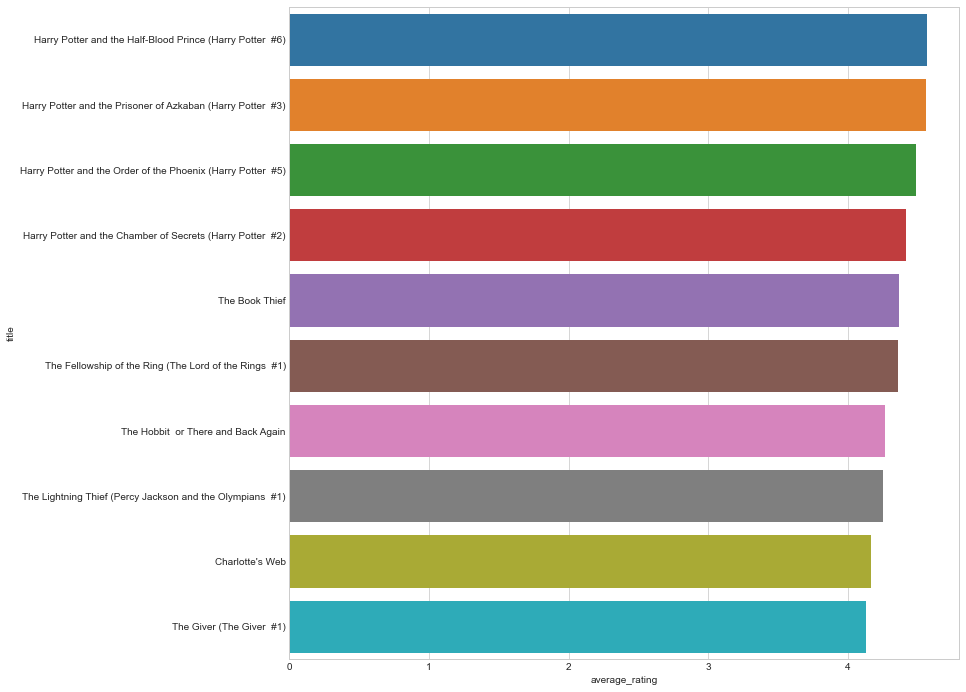

In [8]:
# let's see top books, depending on rating count
top_ten_books = df[df['ratings_count'] > 1000000]
top_ten_books.sort_values(by='average_rating', ascending=False)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 12))
data = top_ten_books.sort_values(by='average_rating', ascending=False).head(10)
sns.barplot(x='average_rating', y='title', data=data)

Let's look at top authors in our dataset, filtered according to the number of books they've written

C:\Users\ninik\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


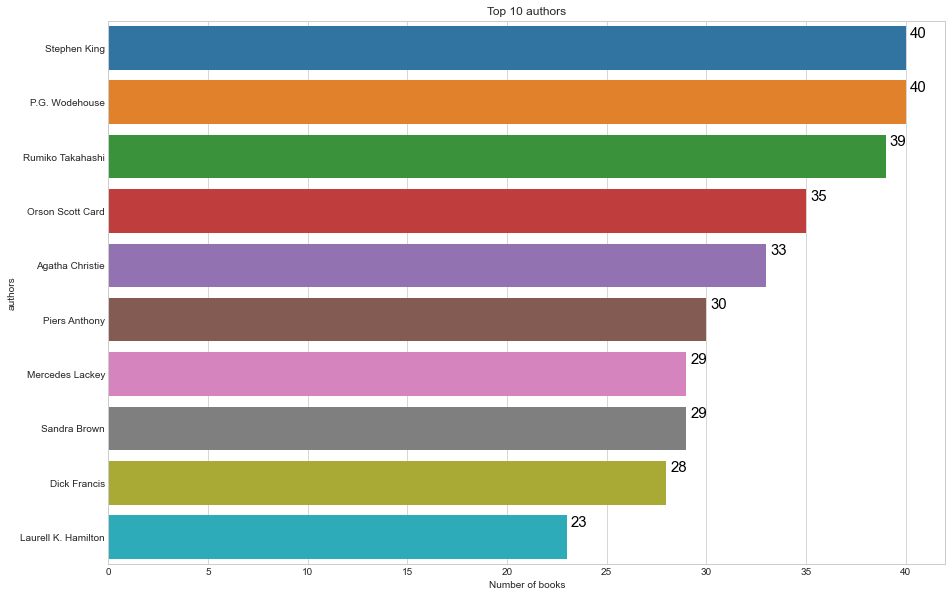

In [9]:
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('authors')

plt.figure(figsize=(15, 10))
ax = sns.barplot(most_books['title'], most_books.index)
ax.set_title("Top 10 authors")
ax.set_xlabel("Number of books")
totals=[]
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

Let's check the most rewieved books.

C:\Users\ninik\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


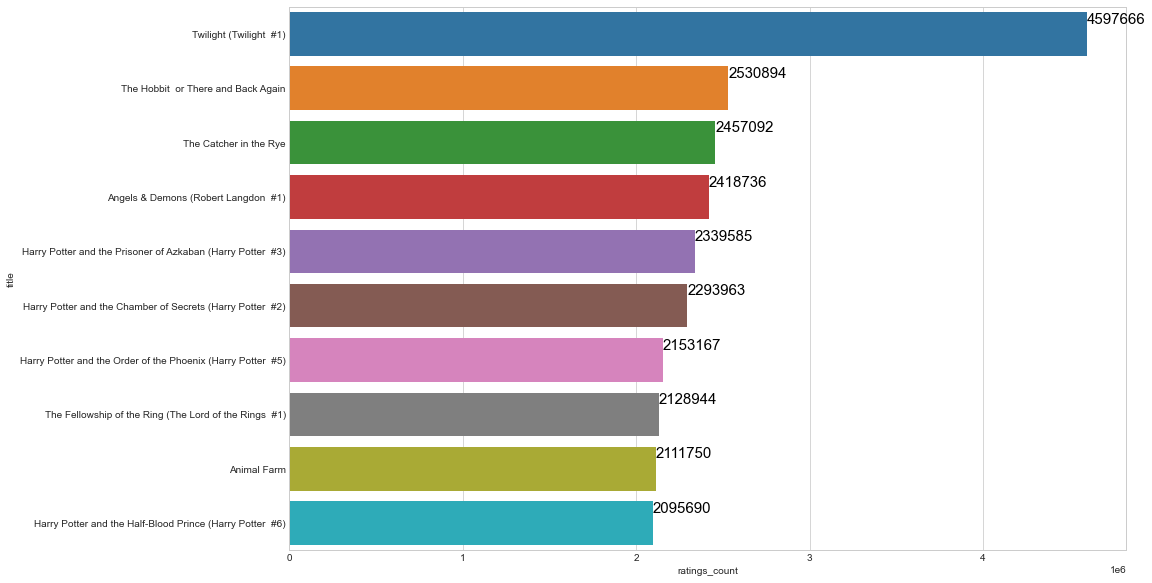

In [10]:
most_rated = df.sort_values('ratings_count', ascending=False).head(10).set_index('title')

plt.figure(figsize=(15,10))
ax = sns.barplot(most_rated['ratings_count'], most_rated.index)
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

C:\Users\ninik\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'average rating')

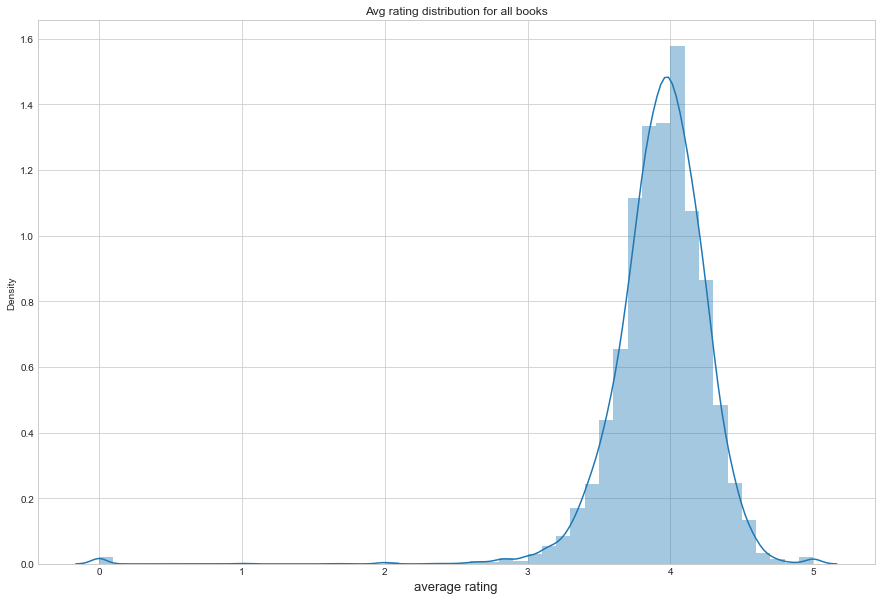

In [12]:
#let's see the average rating distribution
df.average_rating = df.average_rating.astype(float)

fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(df['average_rating'], ax=ax)
ax.set_title("Avg rating distribution for all books")
ax.set_xlabel("average rating", fontsize=13)


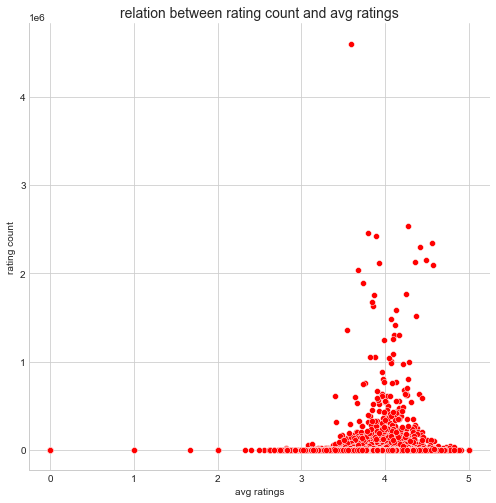

In [13]:
ax = sns.relplot(data=df, x="average_rating", y="ratings_count", color='red', sizes=(100,200), height=7, marker='o')
plt.title("relation between rating count and avg ratings", fontsize=14)
ax.set_axis_labels("avg ratings", "rating count")

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

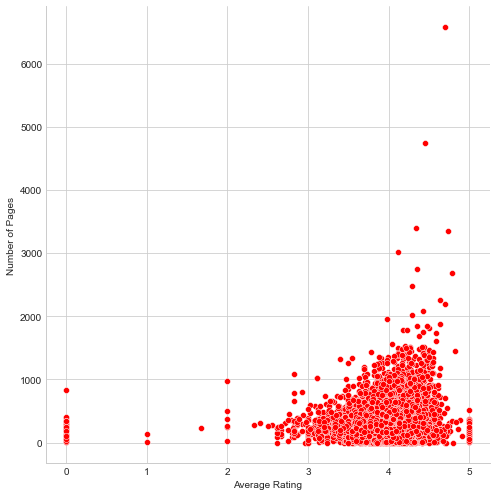

In [15]:
# relation between avg rating and number of pages of books.
plt.figure(figsize=(15,10))

plt.figure(figsize=(15,10))
ax = sns.relplot(x="average_rating", y="  num_pages", data = df, color = 'red',sizes=(100, 200), height=7, marker='o')
ax.set_axis_labels("Average Rating", "Number of Pages")

In [16]:
# let's make a copy of our df so we can be safe
df2 = df.copy()

### Data Preparation

let's create a new column 'rating_between', in which we will divide our averate rating into 5 different categories,such as between 0 and 1, 1 and 2 etc.

In [17]:
df2.loc[(df2['average_rating']>=0) & (df2['average_rating'] <=1), 'rating_between'] = 'between 0 and 1'
df2.loc[(df2['average_rating']>1) & (df2['average_rating'] <=2), 'rating_between'] = 'between 1 and 2'
df2.loc[(df2['average_rating']>2) & (df2['average_rating'] <=3), 'rating_between'] = 'between 2 and 3'
df2.loc[(df2['average_rating']>3) & (df2['average_rating'] <=4), 'rating_between'] = 'between 3 and 4'
df2.loc[(df2['average_rating']>4) & (df2['average_rating'] <=5), 'rating_between'] = 'between 4 and 5'


In [19]:
#let's create new two dataframes containing different values of rating_between
# column we just created.. we will assign a value to 1 if one grade
# failss under a particular group, and others will be assigned to 0
# let's use the same logic for language code as well

In [20]:
rating_df = pd.get_dummies(df2['rating_between'])
language_df = pd.get_dummies(df2['language_code'])

In [21]:
# let's concat our dfs that we want to use as features
features = pd.concat([rating_df,
                     language_df,
                     df2['average_rating'],
                     df2['ratings_count']], axis=1)

In [22]:
# let's scale our values
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [23]:
# let's use knn for our system
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

##### Let's create a function which we will call in case we want to use our recommendation system. we will have to pass book name which we want to use as an argument

In [24]:
def book_recommendation(book_title):
    book_list_name = []
    book_id = df[df['title'] == book_title].index
    book_id = book_id[0]
    for new_id in idlist[book_id]:
        book_list_name.append(df2.loc[new_id].title)
    return book_list_name

book_names = book_recommendation('The Lightning Thief (Percy Jackson and the Olympians  #1)')
book_names

['The Lightning Thief (Percy Jackson and the Olympians  #1)',
 'The Giver (The Giver  #1)',
 'The Book Thief',
 'Little Women',
 'The Fellowship of the Ring (The Lord of the Rings  #1)',
 'Jane Eyre']